# Read and write CSV and XLS files

csv- comma seperator value 
xls - microsoft excel file(older extension)
xlsx (new extension)

In [12]:
#read excel file

df = pd.read_excel('weather_data.xlsx')
df

,Day,Temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-02-01,35.0,7.0,Sunny
2,2017-03-01,28.0,2.0,Snow
3,2017-04-01,24.0,7.0,Snow
4,2017-05-01,32.0,4.0,Rain
5,2017-06-01,31.0,2.0,Sunny


In [10]:
import pandas as pd
df = pd.read_csv('weather_data.csv')
df

,Day,Temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [11]:
#Write DF to csv
df.to_csv('new.csv') #creates a file and copy everything from df to csv. default- it also includes index or serial no.
df.to_csv('new_noIndex.csv',index = False) #if you don't want the index 

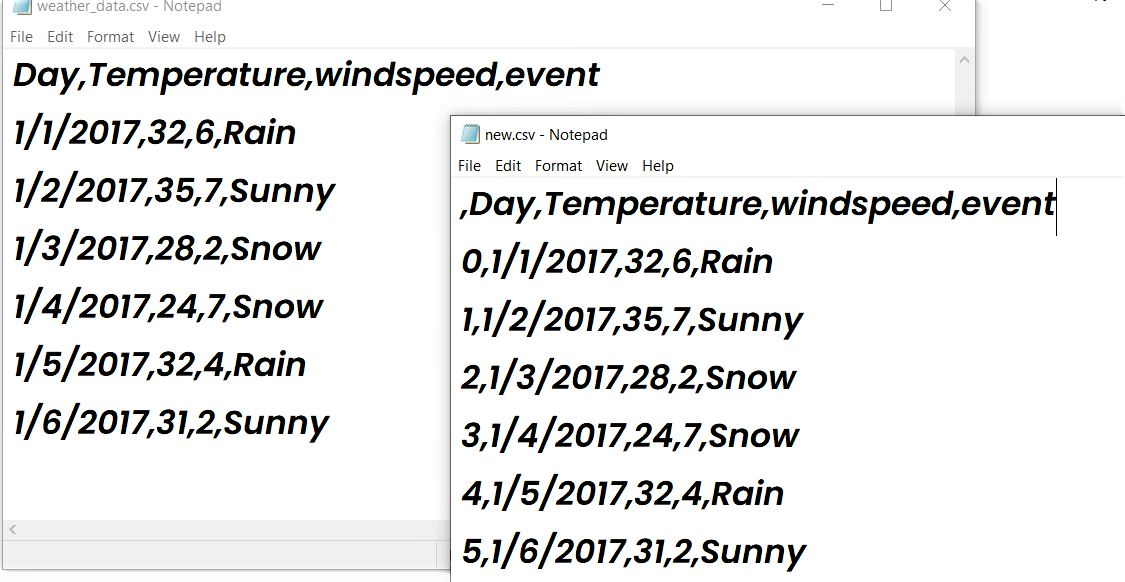

In [14]:
#write DF to excel 
df.to_excel('new_excel.xlsx', sheet_name = 'weather_data')
"""
new_excel is a new file name.
sheert name = name of sheet (as multiple sheets can be in one excel file.)

"""


# GROUP-BY

In [55]:
import pandas as pd
df = pd.read_excel('indian_city_temp.xlsx')
df

,Day,Temperature,cities,windspeed,event
0,2017-01-01,32,Mumbai,6,Rain
1,2017-02-01,35,Indore,7,Sunny
2,2017-03-01,28,Banglore,2,Snow
3,2017-04-01,24,Patna,7,Snow
4,2017-05-01,32,Mumbai,4,Rain
5,2017-06-01,31,Indore,2,Sunny


In [67]:
g = df.groupby('cities')
g

In [59]:
for cities,cities_df in g:
    print(cities)
    print(cities_df)
    
"""
Indices are copied from df. 
They are not serial.
"""

Banglore
         Day  Temperature    cities  windspeed event
2 2017-03-01           28  Banglore          2  Snow
Indore
         Day  Temperature  cities  windspeed  event
1 2017-02-01           35  Indore          7  Sunny
5 2017-06-01           31  Indore          2  Sunny
Mumbai
         Day  Temperature  cities  windspeed event
0 2017-01-01           32  Mumbai          6  Rain
4 2017-05-01           32  Mumbai          4  Rain
Patna
         Day  Temperature cities  windspeed event
3 2017-04-01           24  Patna          7  Snow


'\nIndices are copied from df. \nThey are not serial.\n'

In [60]:
g.get_group('Indore')

,Day,Temperature,cities,windspeed,event
1,2017-02-01,35,Indore,7,Sunny
5,2017-06-01,31,Indore,2,Sunny


In [68]:
#find maximum temperature in each cities
print(g.max())

                Day  Temperature  windspeed  event
cities                                            
Banglore 2017-03-01           28          2   Snow
Indore   2017-06-01           35          7  Sunny
Mumbai   2017-05-01           32          6   Rain
Patna    2017-04-01           24          7   Snow


In [69]:
#find average of temperature of each cities
print(g.mean()) 

          Temperature  windspeed
cities                          
Banglore         28.0        2.0
Indore           33.0        4.5
Mumbai           32.0        5.0
Patna            24.0        7.0


In [71]:
print(g.describe())

         Temperature                                               windspeed  \
               count  mean       std   min   25%   50%   75%   max     count   
cities                                                                         
Banglore         1.0  28.0       NaN  28.0  28.0  28.0  28.0  28.0       1.0   
Indore           2.0  33.0  2.828427  31.0  32.0  33.0  34.0  35.0       2.0   
Mumbai           2.0  32.0  0.000000  32.0  32.0  32.0  32.0  32.0       2.0   
Patna            1.0  24.0       NaN  24.0  24.0  24.0  24.0  24.0       1.0   

                                                    
         mean       std  min   25%  50%   75%  max  
cities                                              
Banglore  2.0       NaN  2.0  2.00  2.0  2.00  2.0  
Indore    4.5  3.535534  2.0  3.25  4.5  5.75  7.0  
Mumbai    5.0  1.414214  4.0  4.50  5.0  5.50  6.0  
Patna     7.0       NaN  7.0  7.00  7.0  7.00  7.0  


# CONCATENATE DATA FRAMES

In [73]:
import pandas as pd
india_weather = pd.DataFrame({
    "city": ["kashmir","Amritsar","Ahemdabad","Bhopal"],  #dict -> hashmap
    "temperature" : [12,39,40,47],
    "humidity": [80,60,78,70]
})

india_weather

,city,temperature,humidity
0,kashmir,12,80
1,Amritsar,39,60
2,Ahemdabad,40,78
3,Bhopal,47,70


In [77]:
us_weather = pd.DataFrame({
    "city": ["new york","chichago","los-angles","orlando"],
    "temperature" : [21,14,35,30],
    "humidity" : [68,65,75,77]
}
)
us_weather

,city,temperature,humidity
0,new york,21,68
1,chichago,14,65
2,los-angles,35,75
3,orlando,30,77


In [78]:
#concatenate two dataFrames
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,kashmir,12,80
1,Amritsar,39,60
2,Ahemdabad,40,78
3,Bhopal,47,70
0,new york,21,68
1,chichago,14,65
2,los-angles,35,75
3,orlando,30,77


In [79]:
#if you want continuos index
df = pd.concat([india_weather,us_weather],ignore_index = True)
df

,city,temperature,humidity
0,kashmir,12,80
1,Amritsar,39,60
2,Ahemdabad,40,78
3,Bhopal,47,70
4,new york,21,68
5,chichago,14,65
6,los-angles,35,75
7,orlando,30,77


In [82]:
df = pd.concat([india_weather, us_weather],axis = 1) #column wise
df

,city,temperature,humidity,city,temperature,humidity
0,kashmir,12,80,new york,21,68
1,Amritsar,39,60,chichago,14,65
2,Ahemdabad,40,78,los-angles,35,75
3,Bhopal,47,70,orlando,30,77


# Merge DataFrames

In [91]:
temperature_df = pd.DataFrame({
    "city" : ["Mumbai","Delhi","Banglore","Hyderabad"],
    "temperature": [32,45,40,43]

})

temperature_df

,city,temperature
0,Mumbai,32
1,Delhi,45
2,Banglore,40
3,Hyderabad,43


In [84]:
humidity_df = pd.DataFrame({
    "city" : ["Delhi", "Mumbai","Banglore"],
    "humidity" : [68,69,75]
})
humidity_df

,city,humidity
0,Delhi,68
1,Mumbai,69
2,Banglore,75


In [92]:
#merge two dataFrame with out explicitly mention index

df = pd.merge(temperature_df, humidity_df, on = 'city') #joing two table using city name
df
#hyderabad is completely dropped becuase hyderabad was not in humidity_df[problem]

,city,temperature,humidity
0,Mumbai,32,69
1,Delhi,45,68
2,Banglore,40,75


In [93]:
#OUTER-JOIN
df = pd.merge(temperature_df,humidity_df,on= 'city',how = 'outer')
df

,city,temperature,humidity
0,Mumbai,32,69.0
1,Delhi,45,68.0
2,Banglore,40,75.0
3,Hyderabad,43,NaN


# NUMERICAL INDEXING (.loc vs iloc)

In [114]:
df = pd.DataFrame([[7, 6],[7, 10],[7, 9.5],[10.5, 19],[10, 19.5]],
    index = ["O.S","C.N","ALGO","LS","CDM"],
    columns = ["T1", "T2"])
df


,T1,T2
O.S,7.0,6.0
C.N,7.0,10.0
ALGO,7.0,9.5
LS,10.5,19.0
CDM,10.0,19.5


In [ ]:
# df - index44
#df - row 4

In [117]:
df.loc['O.S']

T1    7.0
T2    6.0
Name: O.S, dtype: float64

In [118]:
df.iloc[3]

T1    10.5
T2    19.0
Name: LS, dtype: float64

In [119]:
df.iloc['O.S'] #iloc accepts row as a parameter

TypeError: Cannot index by location index with a non-integer key

In [123]:
s = pd.DataFrame([2,4,6,8,10,12,14,16,18,20],
    index = [10,8,4,6,3,7,2,1,9,5]) #custom default
s.loc[:2] #it printed all the value till the index 2 is not found

,0
10,2
8,4
4,6
6,8
3,10
7,12
2,14


In [124]:
s.iloc[:2] #prints upto row2 also row starts from row1 

,0
10,2
8,4
